In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
df_train=pd.read_csv('/content/train.csv',na_values='')
df_test=pd.read_csv('/content/test.csv',na_values='')
comb = [df_train, df_test]
df_train.name = 'Train'
df_test.name = 'Test'
df=pd.concat(comb,axis=0)
df.drop(['Id'],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,G

**normalize sale price**

In [0]:
df.SalePrice=np.log(df.SalePrice)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

find negative or zero values for using boxcox

In [0]:
numeric_features = df_train.select_dtypes(include=[np.number])

print(len(numeric_features.columns))
neg_val={}

for col in numeric_features:
    count=0
    
    for i in df[col]:
        if i<=0:
            count+=1
            neg_val[col]=count 
print(neg_val)

    



38
{'MasVnrArea': 1738, 'BsmtFinSF1': 929, 'BsmtFinSF2': 2571, 'BsmtUnfSF': 241, 'TotalBsmtSF': 78, '2ndFlrSF': 1668, 'LowQualFinSF': 2879, 'BsmtFullBath': 1705, 'BsmtHalfBath': 2742, 'FullBath': 12, 'HalfBath': 1834, 'BedroomAbvGr': 8, 'KitchenAbvGr': 3, 'Fireplaces': 1420, 'GarageCars': 157, 'GarageArea': 157, 'WoodDeckSF': 1523, 'OpenPorchSF': 1298, 'EnclosedPorch': 2460, '3SsnPorch': 2882, 'ScreenPorch': 2663, 'PoolArea': 2906, 'MiscVal': 2816}


corr. to drop one of highly related variables if two are related keeping only one

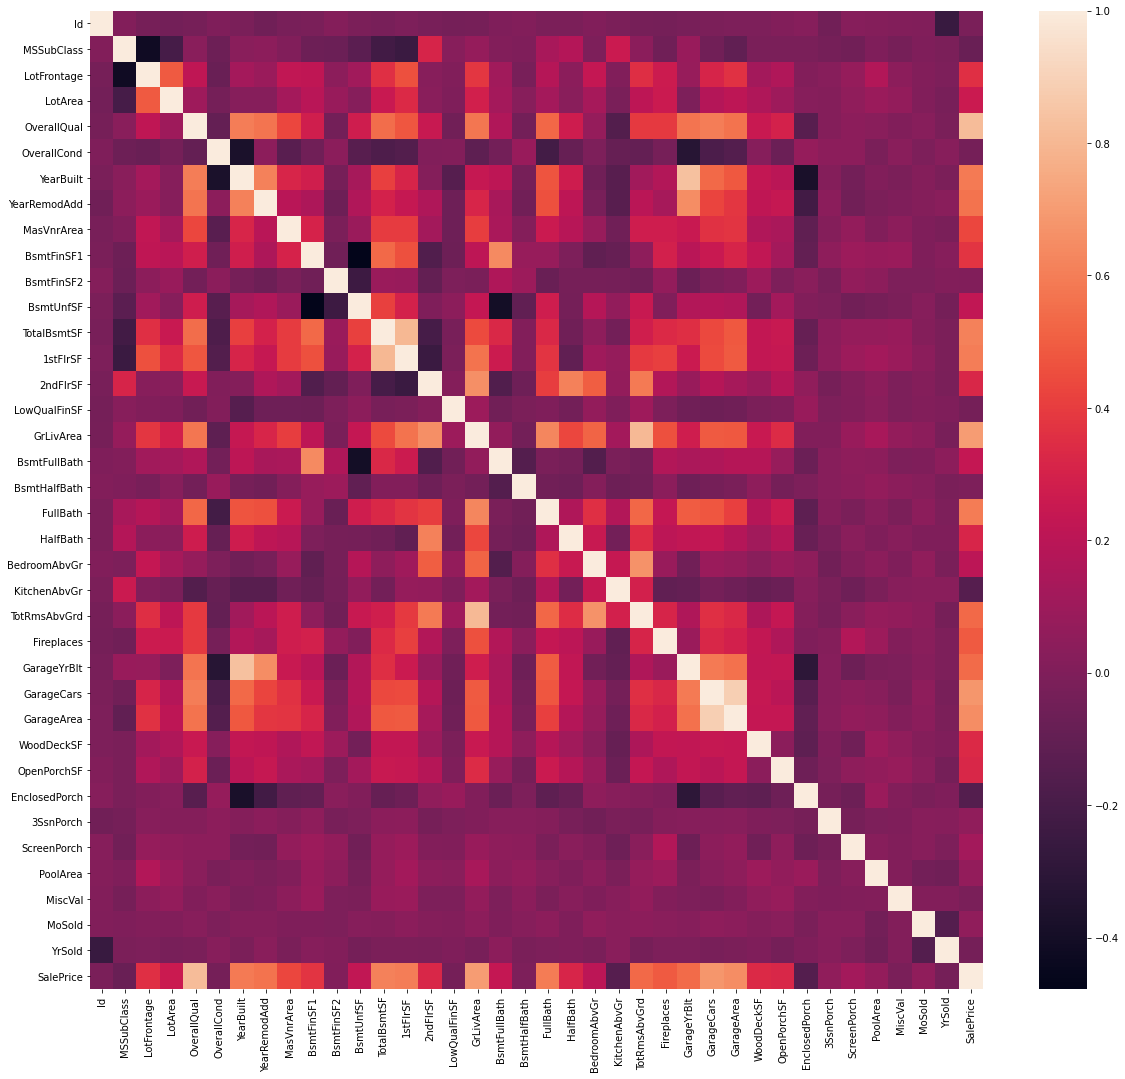

In [0]:
data=df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(data)



dropping some features

In [0]:
df=df.drop(['GarageArea','GarageYrBlt','TotRmsAbvGrd','BsmtUnfSF','YearRemodAdd'],axis=1)

All missing values

In [0]:
mis_value_count_df={}
total_mis_df=0
for col in df.columns:
    count=df[col].isnull().sum()
    total_mis_df=total_mis_df+count
    if count>0:
        mis_value_count_df[col]=count
print('total',total_mis_df)
mis_value_count_df


total 15263


{'Alley': 2721,
 'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFinType1': 79,
 'BsmtFinType2': 80,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'BsmtQual': 81,
 'Electrical': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Fence': 2348,
 'FireplaceQu': 1420,
 'Functional': 2,
 'GarageCars': 1,
 'GarageCond': 159,
 'GarageFinish': 159,
 'GarageQual': 159,
 'GarageType': 157,
 'KitchenQual': 1,
 'LotFrontage': 486,
 'MSZoning': 4,
 'MasVnrArea': 23,
 'MasVnrType': 24,
 'MiscFeature': 2814,
 'PoolQC': 2909,
 'SalePrice': 1459,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}

differentiating categorical features and numerical features

In [0]:
categoricals =df.select_dtypes(exclude=[np.number])
numeric_features = df.select_dtypes(include=[np.number])

in a neighborhood lot frontage is assumed to be similar

In [0]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
df['LotFrontage'].isnull().sum()

0

 remaining missing values in numerical features


In [0]:
mis_value_count_df={}
total_mis_df=0
for col in numeric_features:
    count=df[col].isnull().sum()
    total_mis_df=total_mis_df+count
    if count>0:
        mis_value_count_df[col]=count
print('total',total_mis_df)
mis_value_count_df



total 1490


{'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'GarageCars': 1,
 'MasVnrArea': 23,
 'SalePrice': 1459,
 'TotalBsmtSF': 1}

missing values in categorical data

In [0]:
mis_value_count_df={}
total_mis_df=0
for col in categoricals:
    count=df[col].isnull().sum()
    total_mis_df=total_mis_df+count
    if count>0:
        mis_value_count_df[col]=count
print('total',total_mis_df)
mis_value_count_df

total 13287


{'Alley': 2721,
 'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinType1': 79,
 'BsmtFinType2': 80,
 'BsmtQual': 81,
 'Electrical': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Fence': 2348,
 'FireplaceQu': 1420,
 'Functional': 2,
 'GarageCond': 159,
 'GarageFinish': 159,
 'GarageQual': 159,
 'GarageType': 157,
 'KitchenQual': 1,
 'MSZoning': 4,
 'MasVnrType': 24,
 'MiscFeature': 2814,
 'PoolQC': 2909,
 'SaleType': 1,
 'Utilities': 2}

values filled with mean


In [0]:
cat_with_1or2_missing={'BsmtFinSF1','BsmtFinSF2','BsmtFullBath',
                       'BsmtHalfBath','GarageCars','TotalBsmtSF' }
for cat in cat_with_1or2_missing:
    df[cat].fillna(np.mean(df[cat]), inplace = True)
    

In [0]:
cats = {'MSZoning','Utilities','Exterior1st','Exterior2nd',
        'MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
        'BsmtFinType1','BsmtFinType2','Electrical',
        'KitchenQual', 'Functional','FireplaceQu',
        'GarageType','GarageFinish','GarageQual','GarageCond',
        'PoolQC','Fence','MiscFeature','SaleType'}


    

missing categorical values filled with NONE


In [0]:
df['Fence'].fillna('NoneFence', inplace=True)
df['BsmtFinType1'].fillna('NoneBsmtFinType1', inplace=True)
df['BsmtCond'].fillna('NoneBsmtCond', inplace=True)
df['GarageCond'].fillna('NoneGarageCond', inplace=True)
df['MiscFeature'].fillna('NoneMiscFeature', inplace=True)
df['BsmtQual'].fillna('NoneBsmtQual', inplace=True)
df['GarageType'].fillna('NoneGarageType', inplace=True)
df['GarageFinish'].fillna('NoneGarageFinish', inplace=True)
df['FireplaceQu'].fillna('NoneFireplaceQu', inplace=True)
df['GarageQual'].fillna('NoneGarageQual', inplace=True)
df['PoolQC'].fillna('NonePoolQC', inplace=True)
df['SaleType'].fillna('Oth', inplace=True)
df['BsmtFinType2'].fillna('NoneBsmtFinType2', inplace=True)
df['Alley'].fillna('NoneAlley', inplace=True)
df['MasVnrType'].fillna('NoneMasVnrType', inplace=True)

missing values filled with mode

In [0]:
cat_mis_replace_by_mod={'MSZoning','Functional','Electrical',
                        'Exterior1st','BsmtExposure','Exterior2nd',
                        'Utilities','KitchenQual','MasVnrArea'}
for cat in cat_mis_replace_by_mod:
    df[cat].fillna(df[cat].mode()[0], inplace=True)

copying df to keep old df intact

In [0]:
df_copy=df

Converting categorical features to numerical features by encoding

In [0]:
for col in categoricals:
    dummy=pd.get_dummies(df[col])
    df_copy=df_copy.drop([col],axis=1)
    df_copy=pd.concat([df_copy,dummy],axis=1)
len(df_copy.columns)

299

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline



In [0]:

df_copy = df_copy.loc[:,~df_copy.columns.duplicated()]
duplicate_columns = df_copy.columns[df_copy.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [0]:
df_test=df_copy.iloc[1460:][:]
df_train=df_copy.iloc[:1460][:] 

for competition purpose,X_tt is test data for competition

In [0]:
y=df_train['SalePrice']
X=df_train.drop(['SalePrice'],axis=1)
X_tt=df_test.drop(['SalePrice'],axis=1)


train_test_split

---



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


In [0]:
steps=[("Scale",StandardScaler()),('rf',RandomForestRegressor(n_estimators=200,random_state = 84,n_jobs=-1))]
pipeline=Pipeline(steps)

In [0]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


0.0962934372045806


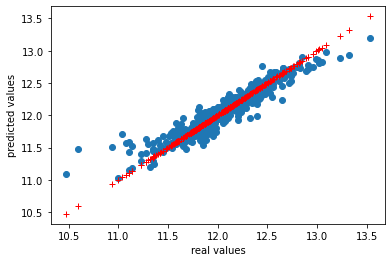

In [0]:
 pipe_res=mean_absolute_error(y_test,y_pred)

plt.scatter(y_test,y_pred)
plt.xlabel('real values')
plt.ylabel('predicted values')
plt.plot(y_test,y_test,'r+')
plt.show
print(pipe_res)


In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8874437092455238

In [0]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse=mean_absolute_error(y_test, y_pred)
r2_score(y_test, y_pred)

[17:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8929168879046225

In [0]:
xgb_model.fit(X, y) 
y_pred = xgb_model.predict(X_tt)

y_pred=np.exp(y_pred)
print(y_pred)

[17:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[124496.37 153837.06 172064.39 ... 145944.08 124745.83 217831.94]


In [0]:
data={'Id':np.arange(1461,2920,1),'SalePrice':y_pred}
submission6=pd.DataFrame(data)
submission6.to_csv('submission10.csv',index=False)